<a href="https://colab.research.google.com/github/srudkin12/RegionalBallMapper/blob/main/Session_3_TDABM_Regional_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Google Colab document has been set up to run in R and contains the code for the Parts A and B of the Topological Data Analysis Ball Mapper for Regional Analysis workshop held at the University of Manchester on Thursday 14th July 2022

For those unfamiliar with the operation of Jupyter Notebook based systems, to run a cell you need to either click the play button (the little triangle) or press SHIFT and ENTER at the same time.

Although this document runs all of the code you need, it is encouraged to also make reference to the commentary documents available on the workshop GitHub page.

In [15]:
install.packages("dplyr")
install.packages("BallMapper")
library(dplyr)
library(BallMapper)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘gridExtra’, ‘htmlwidgets’, ‘spam’, ‘viridis’, ‘maps’, ‘igraph’, ‘networkD3’, ‘fields’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




The following line differs from the code in the commentary and is especially for reading files directly from GitHub into the GoogleColab 

In [2]:
url = 'https://raw.githubusercontent.com/srudkin12/RegionalBallMapper/main/region1.csv'
dtx<-read.table(url,sep=",",header=TRUE)


A first step is always to view the data to make sure that it appears as you would expect

In [4]:
head(dtx)

,geog,geogcode,Armed,Deprivation0,Deprivation1,Deprivation2Plus,HealthVeryGood,HealthGood,HealthLow,Agriculture,⋯,QualLevel1,QualLevel2,QualApprentice,QualLevel3,QualLevel4,QualOther,OwnedOutright,OwnedMortgage,SocialRental,PrivateRental
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adur,E07000223,0.06864764,40.40509,34.44003,25.15488,42.67105,36.56794,20.76101,0.2384521,⋯,15.94140,16.45742,4.363471,11.18053,21.98936,4.491983,37.80465,35.95356,13.068962,11.421894
2,Allerdale,E07000026,0.16282591,42.37336,32.13603,25.49061,44.47844,34.53258,20.98899,3.4052435,⋯,13.67351,16.17990,5.015283,11.52267,22.77338,3.842555,39.40489,29.59263,19.100248,9.781556
3,Amber Valley,E07000032,0.12182260,43.42916,31.21720,25.35364,44.00821,34.98925,21.00254,0.6651959,⋯,13.86936,15.49667,4.643944,11.98520,23.15130,3.860533,38.22724,35.87345,12.327934,11.787969
4,Arun,E07000224,0.10567290,40.41765,35.63997,23.94237,41.98424,36.76815,21.24761,1.8400724,⋯,14.16490,16.77103,3.978155,11.58017,22.77353,5.872515,42.84622,30.99122,8.823794,15.307469
5,Ashfield,E07000170,0.16485770,37.31715,32.22595,30.45689,42.05378,34.47785,23.46837,0.2511927,⋯,16.38710,16.44398,4.316532,12.02300,15.09338,4.354795,33.28425,35.94864,16.214094,12.770219
6,Ashford,E07000105,0.14412154,46.76586,32.49838,20.73576,47.58384,35.08512,17.33104,1.6525910,⋯,15.60630,17.81268,3.856077,12.02107,24.62986,4.901992,31.80781,36.58945,14.470463,14.332350


Let us view the correlations within the dataset

In [5]:
cor(dtx[,3:ncol(dtx)])

,Armed,Deprivation0,Deprivation1,Deprivation2Plus,HealthVeryGood,HealthGood,HealthLow,Agriculture,Manufacturing,Accommodation,⋯,QualLevel1,QualLevel2,QualApprentice,QualLevel3,QualLevel4,QualOther,OwnedOutright,OwnedMortgage,SocialRental,PrivateRental
Armed,1.00000000,0.20258893,0.01820791,-0.23458843,0.10880507,0.0618642707,-0.153794119,0.24001728,-0.015089952,0.020976987,⋯,0.04133622,0.15811262,0.09781621,0.056319274,0.01000652,-0.0343992239,0.112533121,-0.02280193,-0.15766298,0.03524715
Deprivation0,0.20258893,1.00000000,-0.52866289,-0.96388325,0.64301390,0.0461823350,-0.745232053,0.10830668,-0.171911222,-0.336985905,⋯,-0.23441381,0.11648204,0.06744833,0.172029560,0.55670673,-0.3765361558,0.363388246,0.45302641,-0.54342110,-0.30484787
Deprivation1,0.01820791,-0.52866289,1.00000000,0.28350402,-0.29925666,0.3646441224,0.148989534,0.25573759,-0.237162369,0.480950676,⋯,0.04318966,-0.13043625,-0.17877200,-0.212235950,-0.11981834,0.4928144737,-0.108276183,-0.56435282,0.17735397,0.44034527
Deprivation2Plus,-0.23458843,-0.96388325,0.28350402,1.00000000,-0.63255417,-0.1665835468,0.795182558,-0.20259881,0.268628213,0.229810483,⋯,0.25127892,-0.09067102,-0.02010941,-0.127760983,-0.59134796,0.2707702052,-0.376567074,-0.33473986,0.55828639,0.20624256
HealthVeryGood,0.10880507,0.64301390,-0.29925666,-0.63255417,1.00000000,-0.4537543006,-0.889686059,-0.19365567,-0.541166058,-0.128684002,⋯,-0.58091535,-0.47300710,-0.51671029,0.086774626,0.83737769,0.1969872337,-0.285527000,0.02783632,0.03685070,0.25374796
HealthGood,0.06186427,0.04618233,0.36464412,-0.16658355,-0.45375430,1.0000000000,-0.003165393,0.21607385,0.223025203,-0.055249633,⋯,0.47954465,0.43383150,0.30694349,-0.042311194,-0.37260034,0.0003457232,0.271899454,0.24234363,-0.34253741,-0.19096859
HealthLow,-0.15379412,-0.74523205,0.14898953,0.79518256,-0.88968606,-0.0031653932,1.000000000,0.10660801,0.493011870,0.172712605,⋯,0.40618842,0.30851845,0.42257245,-0.075697475,-0.74877592,-0.2212301180,0.181100680,-0.15540290,0.13414785,-0.18690452
Agriculture,0.24001728,0.10830668,0.25573759,-0.20259881,-0.19365567,0.2160738528,0.106608005,1.00000000,0.121203748,0.312062740,⋯,-0.01716352,0.26094558,0.23245168,-0.023241016,-0.06628101,-0.2233128819,0.559734664,-0.24344588,-0.34108408,-0.13895998
Manufacturing,-0.01508995,-0.17191122,-0.23716237,0.26862821,-0.54116606,0.2230252026,0.493011870,0.12120375,1.000000000,-0.247299500,⋯,0.47357473,0.43584366,0.61664096,0.004615051,-0.62700223,-0.3507583446,0.269472845,0.33019658,-0.12381500,-0.48993629
Accommodation,0.02097699,-0.33698590,0.48095068,0.22981048,-0.12868400,-0.0552496330,0.172712605,0.31206274,-0.247299500,1.000000000,⋯,-0.24449813,-0.19872828,-0.08178672,0.179227663,0.03445113,0.1872387575,-0.063929761,-0.66039840,0.17607363,0.46823134


Given the high correlations between many pairs of variables, we will create a small subset of variables and call this dty. The final line creates a dummy variable for a local authority district having a percentage of households with at least one resident with a university degree being greater than 33%

In [6]:
dty<-cbind(dtx[,1:2],dtx$QualLevel4,dtx$Deprivation0,dtx$Accommodation,dtx$Married,dtx$HealthVeryGood,dtx$OwnedMortgage)
names(dty)<-c("geog","geogcode","QualLevel4","Deprivation0","Accommodation","Married","HealthVeryGood","OwnedMortgage")
dty$QL4<-as.numeric(dty$QualLevel4>33) 

Here we use a user defined function called sstatsmat to create a very simple summary statistics table. The remainder of the block then converts to a dataframe and displays. In this code we do not save to a .csv file.

In [7]:

sstatsmat<-function(characteristics,decp){
 if(missing(decp)) decp <- 2
 a001<-ncol(characteristics)
 sstats<-matrix(0,nrow=a001,ncol=5)
 for(i in 1:a001){
  j<-i
  sstats[i,1]<-names(characteristics)[j]
  sstats[i,2]<-round(mean(characteristics[,j]),decp)
  sstats[i,3]<-round(sd(characteristics[,j]),decp)
  sstats[i,4]<-round(min(characteristics[,j]),decp)
  sstats[i,5]<-round(max(characteristics[,j]),decp)
 }
 return(sstats)
}

s001<-sstatsmat(dty[,3:8]) # Creates an object with the summary statistics
s001<-as.data.frame(s001) # Convert to data frame
names(s001)<-c("Variable","Mean","s.d.","Min","Max")
s001

Variable,Mean,s.d.,Min,Max
<chr>,<chr>,<chr>,<chr>,<chr>
QualLevel4,27.06,7.82,14.21,68.36
Deprivation0,43.54,6.34,24.98,59.42
Accommodation,5.56,1.92,3.21,23.87
Married,47.56,6.64,23.19,58.64
HealthVeryGood,47.06,3.61,38.22,57.84
OwnedMortgage,33.3,5.38,10.01,44.16


Create the correlation matrix for the reduced data set

In [8]:
c001<-cor(dty[,3:8])
c001

,QualLevel4,Deprivation0,Accommodation,Married,HealthVeryGood,OwnedMortgage
QualLevel4,1.00000000,0.5567067,0.03445113,-0.15119122,0.83737769,-0.27369213
Deprivation0,0.55670673,1.0000000,-0.33698590,0.58474351,0.64301390,0.45302641
Accommodation,0.03445113,-0.3369859,1.00000000,-0.26588049,-0.12868400,-0.66039840
Married,-0.15119122,0.5847435,-0.26588049,1.00000000,-0.07519867,0.56762522
HealthVeryGood,0.83737769,0.6430139,-0.12868400,-0.07519867,1.00000000,0.02783632
OwnedMortgage,-0.27369213,0.4530264,-0.66039840,0.56762522,0.02783632,1.00000000


**Plotting**

In this section we will be producing graphs. To save these please right click and then select the "Save image as..." option.

We start with a basic scatter, setting the axis limits to 0,60 to reflect the ranges in the summary statistics table.

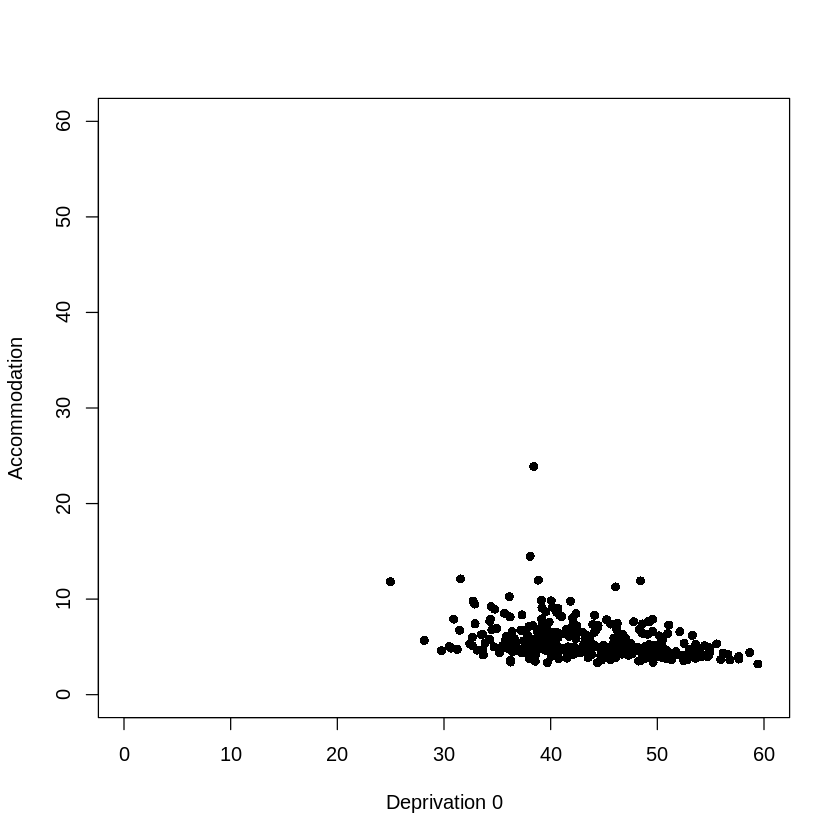

In [10]:
plot(dty$Deprivation0,dty$Accommodation,pch=16,xlim=c(0,60),ylim=c(0,60),xlab="Deprivation 0",ylab="Accommodation")

In order to visualise the data easier we will create two subsets...

In [11]:
dty0<-subset(dty,dty$QL4==0)
dty1<-subset(dty,dty$QL4==1)

Now we produce a graph on the 0 to 60 axis range with colouration according to the QL4 dummy created earlier

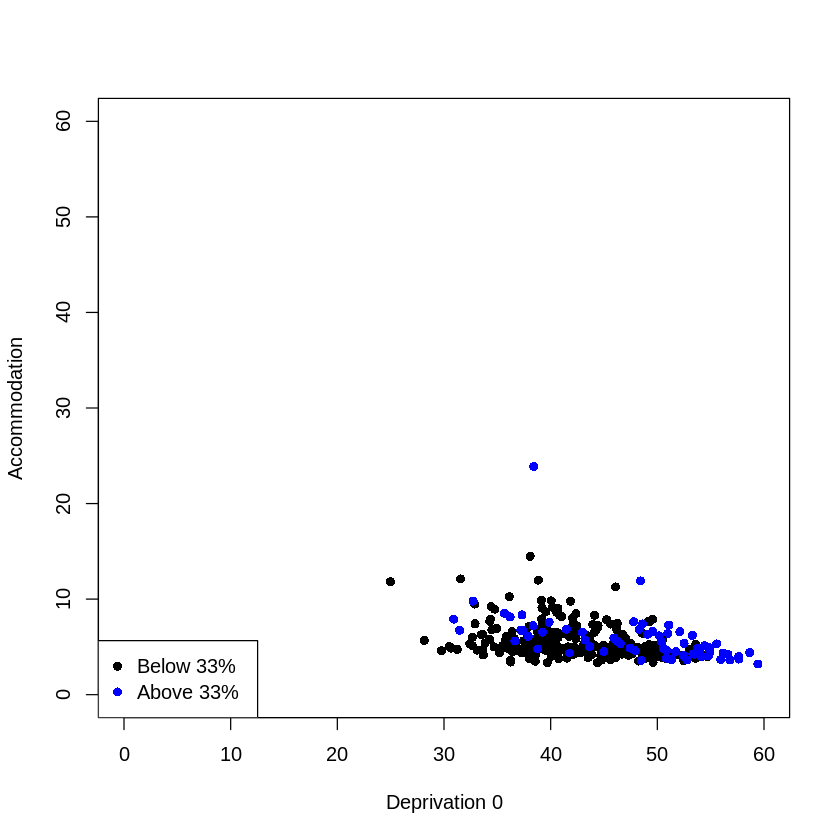

In [12]:
plot(dty0$Deprivation0,dty0$Accommodation,pch=16,xlim=c(0,60),ylim=c(0,60),xlab="Deprivation 0",ylab="Accommodation") # Note the limits are set based on summary statistics
points(dty1$Deprivation0,dty1$Accommodation,pch=16,col="blue")
leg.text=c("Below 33%","Above 33%")
legend("bottomleft",leg.text,pch=16,col=c("black","blue"))

In the second version of the plot we allow R to set the range based on the full set of data for the two axis varaibles. We then colour the points using the subsets. Remember with all the plots you can right click and select "Save image as..."

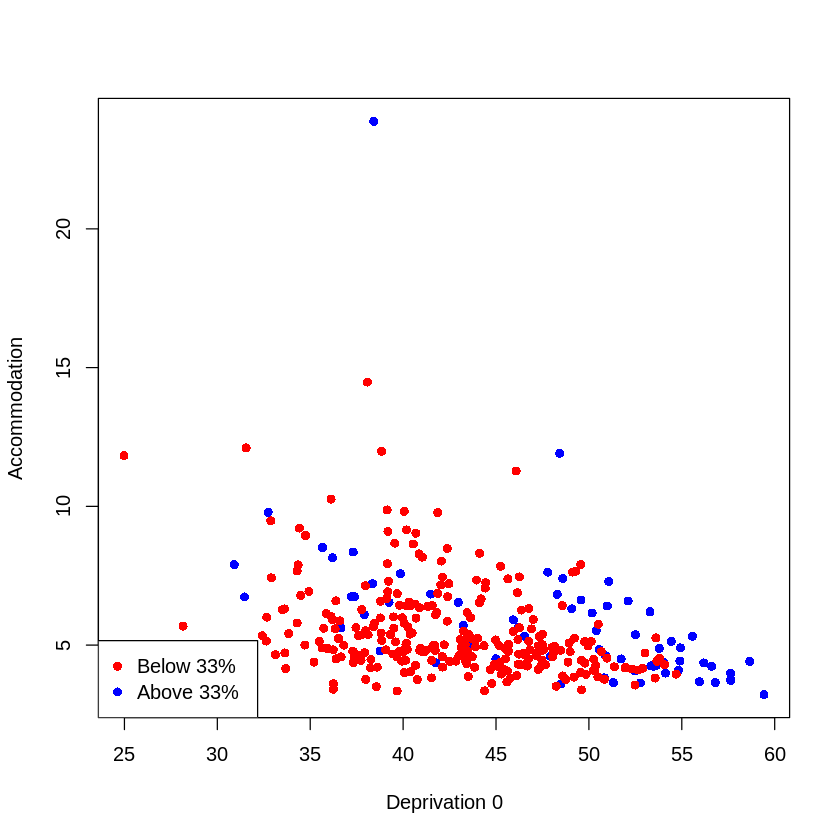

In [13]:
plot(dty$Deprivation0,dty$Accommodation,pch=16,xlab="Deprivation 0",ylab="Accommodation") # Note the limits are set based on the full data dty and not either dty1 or dty2
points(dty1$Deprivation0,dty1$Accommodation,pch=16,col="blue")
points(dty0$Deprivation0,dty0$Accommodation,pch=16,col="red")
leg.text=c("Below 33%","Above 33%")
legend("bottomleft",leg.text,pch=16,col=c("red","blue"))

# **Part B: Ball Mapper**

From this point forward the example follows Part B of the commentary. Here we introduce BallMapper (Dlotko, 2019) and provide some very basic usage on the dty dataset that was created by following the part A code above.

The first step is to make sure that our outcomes and axis variables are in data.frame objects ready for the BallMapper function

In [17]:
y1<-as.data.frame(dty$QualLevel4)
y2<-as.data.frame(dty$QL4)
x1<-as.data.frame(dty[,4:8])

We know already that Accommodation does not have the same range as some of the other variables. Therefore we use the normalisation function within the BallMapper package to put the variables in x1 onto the scale [0,1]

In [18]:
x2<-normalize_to_min_0_max_1(x1)

We may now create our first BallMapper plot. For this we need to specify the axis variables (x2), the outcome that we want to use for the colouration (y1) and the radius for the balls. Here we choose 0.3.

Again if you wish to save the image you can right click and select "Save image as..."

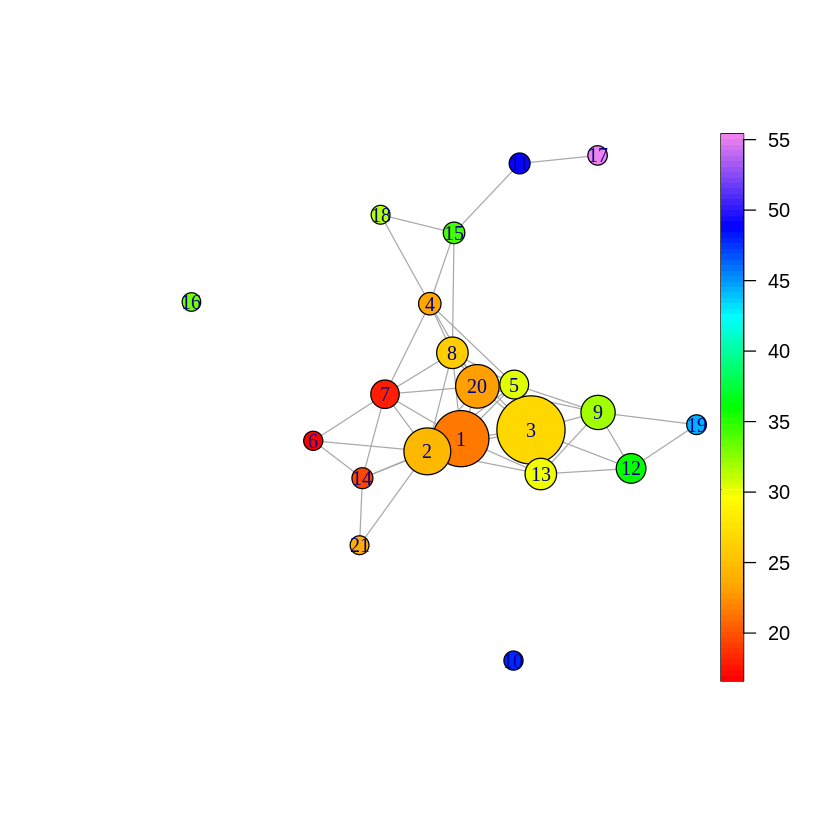

In [19]:
bm1<-BallMapper(x2,y1,0.3)
ColorIgraphPlot(bm1,seed_for_plotting=123)

We will now create BallMapper plots with different radii. Note that you will not see any output from this block of code and it may take a few moments to run

In [20]:
bm125<-BallMapper(x2,y1,0.25)
bm130<-BallMapper(x2,y1,0.30)
bm135<-BallMapper(x2,y1,0.35)
bm140<-BallMapper(x2,y1,0.40)
bm145<-BallMapper(x2,y1,0.45)
bm150<-BallMapper(x2,y1,0.50)


To view the BM graphs that have been created you can simply edit the bm125 in the block below to one of the other bm numbers (e.g. bm150). 

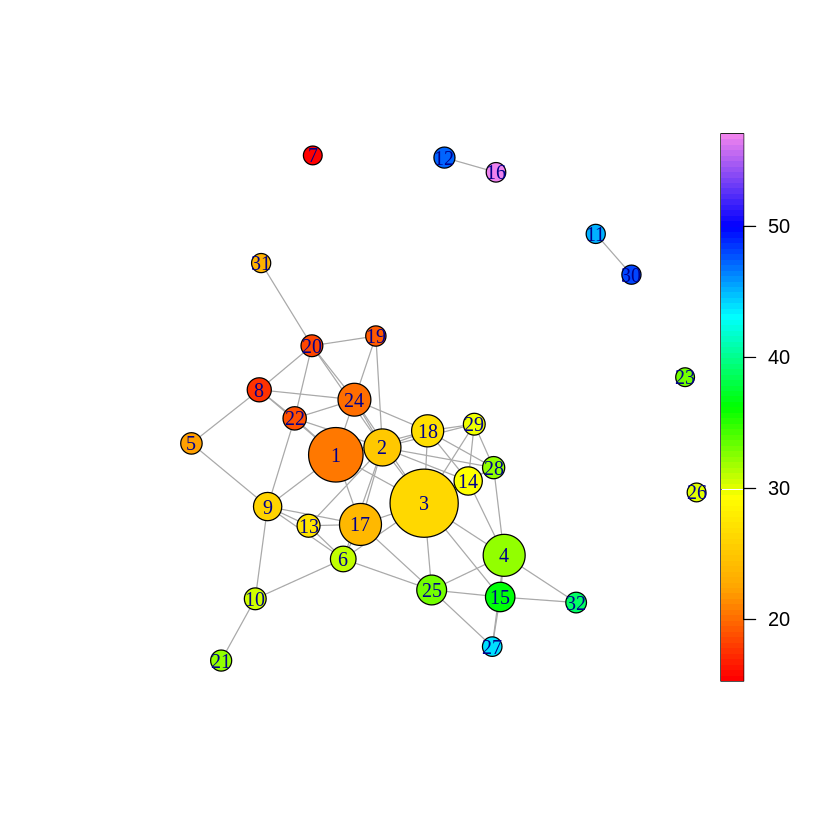

In [21]:

ColorIgraphPlot(bm125,seed_for_plotting=123)

We can repeat the BallMapper graphs but this time use the QL4 dummy. The colour now represents the proportion of local authority districts within the ball that have a value of 1 on the QL4 dummy.

In [22]:
bm225<-BallMapper(x2,y2,0.25)
bm230<-BallMapper(x2,y2,0.30)
bm235<-BallMapper(x2,y2,0.35)
bm240<-BallMapper(x2,y2,0.40)
bm245<-BallMapper(x2,y2,0.45)
bm250<-BallMapper(x2,y2,0.50)

As with the first set of BM plots here we will only write one plotting line and then leave it for editing to see the other radii. In the commentary bm230 is used.

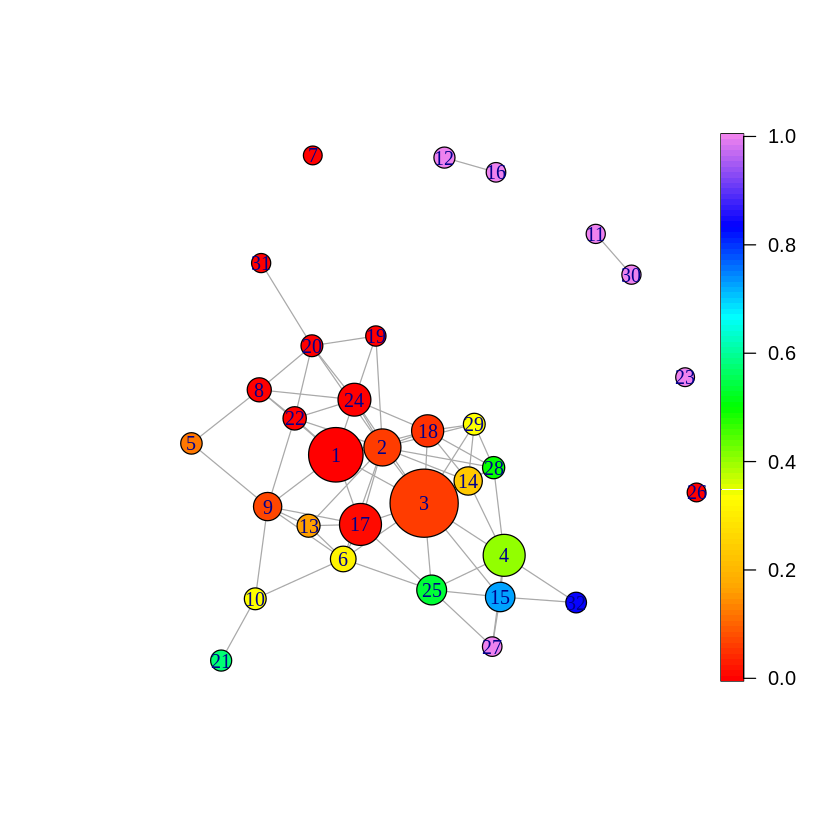

In [23]:
ColorIgraphPlot(bm225,seed_for_plotting=123)

This is all of the material covered in Session 3 of the Topological Data Analysis Ball Mapper for Regional Analysis workshop. You can find a Colab to go with the Session 4 on the GitHub page.